In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from pandas.tools.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

# Context and description of the data

1. Background information on the subject and field of study

2. Information about data collection:

    a. Who collected the data
    
    b. When the data was collected
    
    c. How the data was collected
    
    d. Any implications this may have on analysis

__1. Background information on the subject and field of study.__

The data explores the detailed information of housing located in 351 suburbs in Melhourne. Melbourne is the second-most populous city in Australia, which has prosperous education, economy, entertainment, tourism and etc. Usually, the price of housing varies in a large range, especially in a big city like Melbourne, depends on furnishment, sqft, distance to CBD and neighborhood. We are interested in what partern of housing characteristics will affect the price at different suburbs in Melbourne ciy.

__2. Information about data collection:__

According to Kaggle, we can know that Tony Pino collected the data starting from 2016 and this data was scraped from publicly available results posted every week from Domain.com.au. Tony Pino said he've cleaned it as best he can before he upload it, so we just need to start to data analysis. The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.

# Exploratory Analysis of the Data

1.Summary statistics and the distributional shape of variables in the data

2.Unusual features or outliers present in the data

3.Potential relationships that may exist in the data, including, but not limited to:
   
    a. two-way tables and side-by-side bar charts for relationships between categorical data
    
    b. scatter plots for relationships between numeric data
    
    c. side-by-side histograms or boxplots for relationships between numeric and categorical data

4.Findings should be reported with readable tables or clearly labeled graphs.

5.There must also be text to explain the findings and the included tables.

__1. Summary statistics and the distributional shape of variables in the data__

_Summary statistics of full data_

In [8]:
housing = pd.read_csv("Melbourne_housing_FULL.csv")
housing.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [9]:
housing.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


_Distributional shape of variables in the full data_

In [10]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

In [11]:
print(housing.shape)

(34857, 21)


__2. Unusual features or outliers present in the data__

_In this data, it have columns: Rooms, Bedrooms2, Bathroom. As usual, if we go to see the apartment or house, manager/officer always say the number of rooms and how many bedrooms and bathrooms inside one unit. However, in this data, when we tried to use "Rooms" minus "Bedroom", it appear few negative number, like, -6,-5,-4 and etc. That is not make sense. Hence, we believed 
"Rooms" and "Bedrooms2" and "Bathroom" is not well-organize in this data, it should have more specific or clear meaning, or else it would confuse people who interest this data._

In [12]:
housing['Real Rooms'] = housing['Rooms'] - housing['Bedroom2']
print(housing.groupby('Real Rooms')['Bathroom'].count())

Real Rooms
-27.0        1
-17.0        1
-7.0         1
-6.0         2
-5.0         1
-3.0         2
-2.0        23
-1.0       248
 0.0     25683
 1.0       569
 2.0        77
 3.0        18
 4.0         4
 8.0         1
Name: Bathroom, dtype: int64


_From the below table, it easily to see that we got some negative number, even appeared -27. And we can see that mostly are equal to 0, but if "Rooms" are equal to "Bedroom2", why the data inputer would separate to two variables? That is only us guess, so we believed that these three variables is not well-organize._

__3.Potential relationships that may exist in the data, including__

_We were trying to figure the correlation with each variables. Here we made:_

In [13]:
housing.corr()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Real Rooms
Rooms,1.000000,0.465238,0.271511,0.085890,0.946755,0.611826,0.393878,0.037402,0.156229,-0.012749,0.004872,0.103235,-0.071677,0.099010
Price,0.465238,1.000000,-0.211384,0.044950,0.430275,0.429878,0.201803,0.032748,0.100754,-0.333306,-0.215607,0.197874,-0.059017,0.033768
Distance,0.271511,-0.211384,1.000000,0.481566,0.269524,0.126201,0.241835,0.060862,0.076301,0.323059,-0.100417,0.200946,-0.018140,-0.022770
Postcode,0.085890,0.044950,0.481566,1.000000,0.089292,0.120080,0.067886,0.040664,0.042437,0.089805,-0.231027,0.362895,0.017108,-0.010684
Bedroom2,0.946755,0.430275,0.269524,0.089292,1.000000,0.614892,0.388491,0.037019,0.154157,-0.002022,0.003447,0.106164,-0.053451,-0.226636
Bathroom,0.611826,0.429878,0.126201,0.120080,0.614892,1.000000,0.307518,0.036333,0.147558,0.167955,-0.059183,0.106531,-0.032887,-0.049595
Car,0.393878,0.201803,0.241835,0.067886,0.388491,0.307518,1.000000,0.037829,0.104373,0.128702,-0.009020,0.047213,-0.009617,-0.010382
Landsize,0.037402,0.032748,0.060862,0.040664,0.037019,0.036333,0.037829,1.000000,0.354530,0.044474,0.025318,-0.002582,-0.018195,-0.001563
BuildingArea,0.156229,0.100754,0.076301,0.042437,0.154157,0.147558,0.104373,0.354530,1.000000,0.067811,0.017155,-0.002143,-0.024523,0.007241
YearBuilt,-0.012749,-0.333306,0.323059,0.089805,-0.002022,0.167955,0.128702,0.044474,0.067811,1.000000,0.091592,-0.022175,0.022420,-0.032317


_Since our outcome variables is "Price", we tried to create the correlation table to see the list of the correlation with Price. After we made it, we can see that the most correlation with the price is "Rooms", later is "Bedroom2", then is "Bathroom", "Car" is following. And sicne those variables have the high correlation, we will use try to analusus these variables and after we do the explorary job, may use these useful variables in our model._

In [14]:
corr_matrix = housing.corr()
print(corr_matrix["Price"].sort_values(ascending=False))

Price            1.000000
Rooms            0.465238
Bedroom2         0.430275
Bathroom         0.429878
Car              0.201803
Longtitude       0.197874
BuildingArea     0.100754
Postcode         0.044950
Real Rooms       0.033768
Landsize         0.032748
Propertycount   -0.059017
Distance        -0.211384
Lattitude       -0.215607
YearBuilt       -0.333306
Name: Price, dtype: float64


_Looking for the distribution of 'Price'_

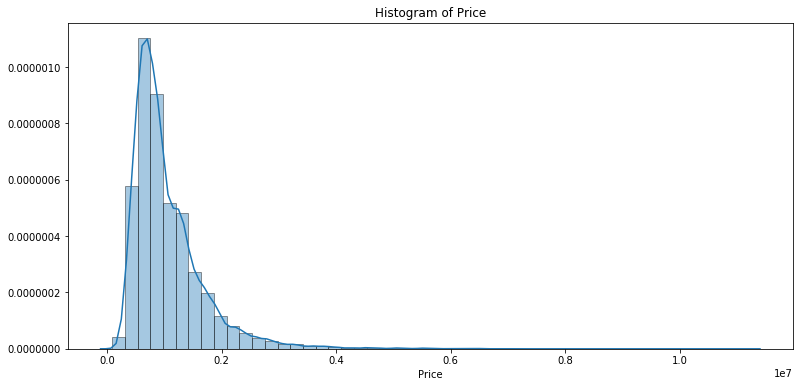

In [15]:
df = housing.loc[(housing['Price'].isnull() == False)]
plt.figure(figsize=(13,6))
sns.distplot(df['Price'], kde = True,hist_kws=dict(edgecolor="k"))
plt.title("Histogram of Price")
plt.xlabel("Price")
plt.show()

__a. two-way tables and side-by-side bar charts for relationships between categorical data__

_Create a new data frame by selecting useful variables._

In [16]:
df = housing[['Rooms', 'Type', 'Price', 'BuildingArea',
              'Method','Distance', 'Bedroom2', 'Bathroom', 
              'Car', 'CouncilArea','Regionname','YearBuilt']]

__Creating a new variable: 'RangeofDistance'__

_In data, distance are too many differnet number that hard to analysis. Hence, we used the "pd.cut" let "Distance" split into 5 group for eaiser to analysis its relationship with Price. The reason we use (0,60,10) is the min of distance is 0, and the maximum is 60. Besides, after we discussed, we believed 5 groups is better to do the explorary job._

In [17]:
df["RangeofDistance"] =pd.cut(df.Distance,bins=np.arange(0,60,10),right=False)
housing["RangeofDistance"] =pd.cut(housing.Distance,bins=np.arange(0,60,10),right=False)

C:\Users\yvonne\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


_Here is how the data of distance looks like, after we split it into 5 group_

In [18]:
#cant make the thing I want.....
##From below, easily see that the most close to the Business Center.....
print(df.groupby('RangeofDistance')['Price'].unique())

RangeofDistance
[0, 10)     [nan, 1480000.0, 1035000.0, 1465000.0, 850000....
[10, 20)    [840000.0, 730000.0, 770000.0, nan, 603000.0, ...
[20, 30)    [640000.0, 500000.0, 825000.0, 642000.0, 66500...
[30, 40)    [627500.0, 572000.0, nan, 400000.0, 640000.0, ...
[40, 50)    [689000.0, 521000.0, 650000.0, 510000.0, 54000...
Name: Price, dtype: object


_From below, we can see that as the distance far from Business Center, the number of rooms,bedroom and Bathrooms would increase which mean that if you want to buy a hourse to invest, like for renting the house out, and near the "CBD", that is not a good choice for some big family, it good to businessman or small family._

In [19]:
print(df.groupby('RangeofDistance')['Rooms'].mean())
print(df.groupby('RangeofDistance')['Bedroom2'].mean())
print(df.groupby('RangeofDistance')['Bathroom'].mean())

RangeofDistance
[0, 10)     2.774507
[10, 20)    3.240573
[20, 30)    3.381512
[30, 40)    3.372385
[40, 50)    3.649573
Name: Rooms, dtype: float64
RangeofDistance
[0, 10)     2.825456
[10, 20)    3.295725
[20, 30)    3.459116
[30, 40)    3.425987
[40, 50)    3.688889
Name: Bedroom2, dtype: float64
RangeofDistance
[0, 10)     1.537189
[10, 20)    1.689553
[20, 30)    1.789741
[30, 40)    1.722039
[40, 50)    1.922222
Name: Bathroom, dtype: float64


_In addition, as a adviser to help people to invest, we showed the relationship between the Distance to "CBD" and the distribution of house. We can conclude that mostly house like to live in the range from 0 to 20. That is the better range to invest hosue._

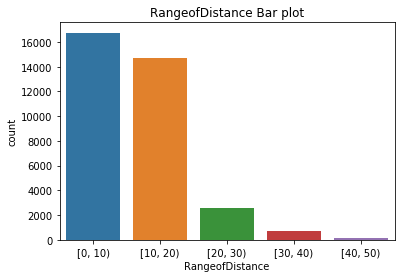

In [20]:
sns.countplot(data = df, x = 'RangeofDistance')
plt.title("RangeofDistance Bar plot")
plt.show()

__Creating a new variable: 'yeargroup'__

In [21]:
# starting with the mean of YearBuilt
housing["yeargroup"] = pd.cut(housing.YearBuilt,bins=np.arange(1965,2050,10),right=False)
summary = housing.groupby('yeargroup')[["Price"]].mean()
summary = summary.dropna()
print(summary)
print(summary.shape)

                     Price
yeargroup                 
[1965, 1975)  7.894192e+05
[1975, 1985)  8.578595e+05
[1985, 1995)  9.233559e+05
[1995, 2005)  9.456095e+05
[2005, 2015)  9.229580e+05
[2015, 2025)  1.225991e+06
(6, 1)


The mean price increases as year increases

In [22]:
index = np.array([1965,1975,1985,1995,2005,2015])
print(index)
summary.index = index
print(summary)

[1965 1975 1985 1995 2005 2015]
             Price
1965  7.894192e+05
1975  8.578595e+05
1985  9.233559e+05
1995  9.456095e+05
2005  9.229580e+05
2015  1.225991e+06


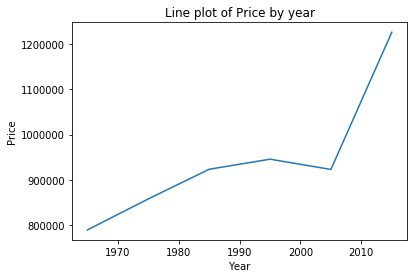

In [23]:
#Plotting the line plot of price vs year
plt.plot(summary)
plt.title("Line plot of Price by year")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

Oeverlly, price increases as year increases, starting from 2005, the  price increases in a respectively large slope.

__Variable: 'Type'__

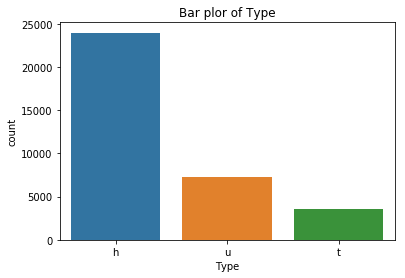

In [24]:
#Type: h - house,cottage,villa, semi,terrace; 
# u - unit, duplex; 
# t - townhouse; dev site - development site; 
# o res - other residential
sns.countplot(data = df,x = 'Type')
plt.title("Bar plor of Type")
plt.show()

The number of type-h housing is the most and type-t has the least.

_From the following summary table, we can see that...._

In [25]:
print(housing.groupby('Type')['Rooms'].count())
print(housing.groupby('Type')['Car'].mean())

Type
h    23980
t     3580
u     7297
Name: Rooms, dtype: int64
Type
h    1.866697
t    1.602782
u    1.140742
Name: Car, dtype: float64


Averagely, type-h housing has 1.87 parking space, type-t has 1.60 parking space and type-u has 1.14 parking space.

__Variable: CouncilArea__

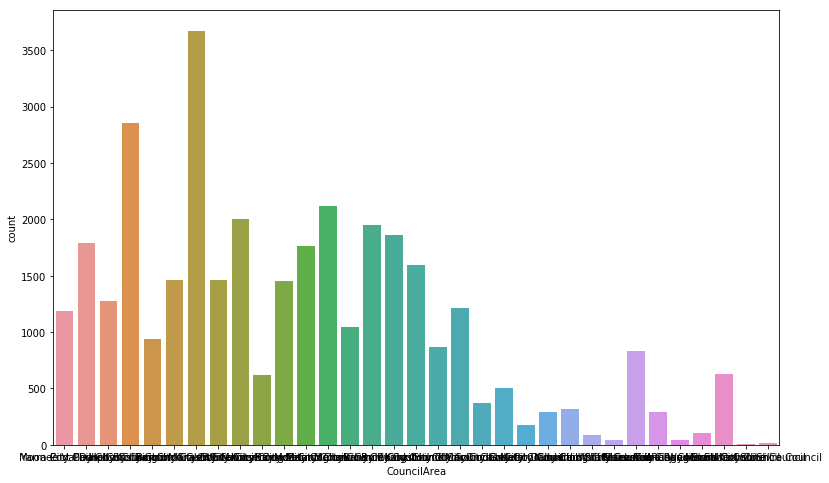

In [26]:
# plotting the CouncilArea countplot.
plt.figure(figsize=(13,8))
sns.countplot(data = df,x = 'CouncilArea')
plt.show()

In [27]:
print(housing.groupby('CouncilArea')['Price'].count().sort_values(ascending=False).head())

CouncilArea
Boroondara City Council       2520
Darebin City Council          2349
Moreland City Council         1790
Glen Eira City Council        1643
Moonee Valley City Council    1584
Name: Price, dtype: int64


Boroondara City Council, Darebin City Council, Moreland City Council, Glen Eira City Council
and moonee Valley city Council are top five areas that have the most housing.

__Variable: Method__

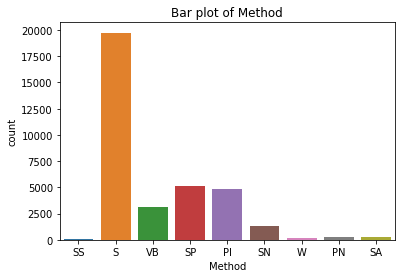

In [28]:
# plotting bar plot of method
sns.countplot(data = df,x = 'Method')
plt.title("Bar plot of Method")
plt.show()

_Method:_

_S - property sold_

_SP - property sold prior_

_PI - property passed in_

_PN - sold prior not disclosed_

_SN - sold not disclosed_

_NB - no bid_

_VB - vendor bid_

_W - withdrawn prior to auction_

_SA - sold after auction_

_SS - sold after auction price not disclosed_

__b. scatter plots for relationships between numeric data__

__Cleaning Data__

_As usual, we delete the NA value in some variables, including 'Rooms','Price','Bedroom2','Bathroom','Landsize','Car','BuildingArea'_

In [29]:
df = housing.loc[((housing['Rooms'].isnull() == False) & 
                  (housing['Price'].isnull() == False) &  
                  (housing['Bedroom2'].isnull() == False) & 
                  (housing['Bathroom'].isnull() == False) & 
                  (housing['Car'].isnull() == False) & 
                 (housing['Landsize'].isnull() == False) & 
                 (housing['BuildingArea'].isnull() == False))]

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9244 entries, 2 to 34856
Data columns (total 24 columns):
Suburb             9244 non-null object
Address            9244 non-null object
Rooms              9244 non-null int64
Type               9244 non-null object
Price              9244 non-null float64
Method             9244 non-null object
SellerG            9244 non-null object
Date               9244 non-null object
Distance           9244 non-null float64
Postcode           9244 non-null float64
Bedroom2           9244 non-null float64
Bathroom           9244 non-null float64
Car                9244 non-null float64
Landsize           9244 non-null float64
BuildingArea       9244 non-null float64
YearBuilt          8895 non-null float64
CouncilArea        9244 non-null object
Lattitude          9235 non-null float64
Longtitude         9235 non-null float64
Regionname         9244 non-null object
Propertycount      9244 non-null float64
Real Rooms         9244 non-null float64


_After cleaning data, there are 8513 observations, 24 variables._

In [31]:
print(df.shape)

(9244, 24)


In [32]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,9244.0,3.098118e+00,0.964029,1.00000,2.0000,3.0000,4.000000e+00,1.200000e+01
Price,9244.0,1.092329e+06,679621.207086,131000.00000,641000.0000,900000.0000,1.341250e+06,9.000000e+06
Distance,9244.0,1.124115e+01,6.882570,0.00000,6.4000,10.3000,1.390000e+01,4.810000e+01
Postcode,9244.0,3.112417e+03,115.001476,3000.00000,3044.0000,3083.0000,3.150250e+03,3.977000e+03
Bedroom2,9244.0,3.077347e+00,0.966366,0.00000,2.0000,3.0000,4.000000e+00,1.200000e+01
Bathroom,9244.0,1.652423e+00,0.724991,1.00000,1.0000,2.0000,2.000000e+00,9.000000e+00
Car,9244.0,1.695370e+00,0.975529,0.00000,1.0000,2.0000,2.000000e+00,1.000000e+01
Landsize,9244.0,5.288338e+02,1212.965090,0.00000,210.0000,474.0000,6.510000e+02,4.450000e+04
BuildingArea,9244.0,1.569946e+02,480.976260,0.00000,100.0000,132.0000,1.810000e+02,4.451500e+04
YearBuilt,8895.0,1.965777e+03,37.055054,1196.00000,1945.0000,1970.0000,2.000000e+03,2.019000e+03


_Creating a new data frame only with numeric variables, which strong correlate with 'Price'_

In [33]:
df = df.loc[:,["Price","Rooms","Bathroom","Bedroom2","Car"]]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9244 entries, 2 to 34856
Data columns (total 5 columns):
Price       9244 non-null float64
Rooms       9244 non-null int64
Bathroom    9244 non-null float64
Bedroom2    9244 non-null float64
Car         9244 non-null float64
dtypes: float64(4), int64(1)
memory usage: 433.3 KB


__Pairplot__

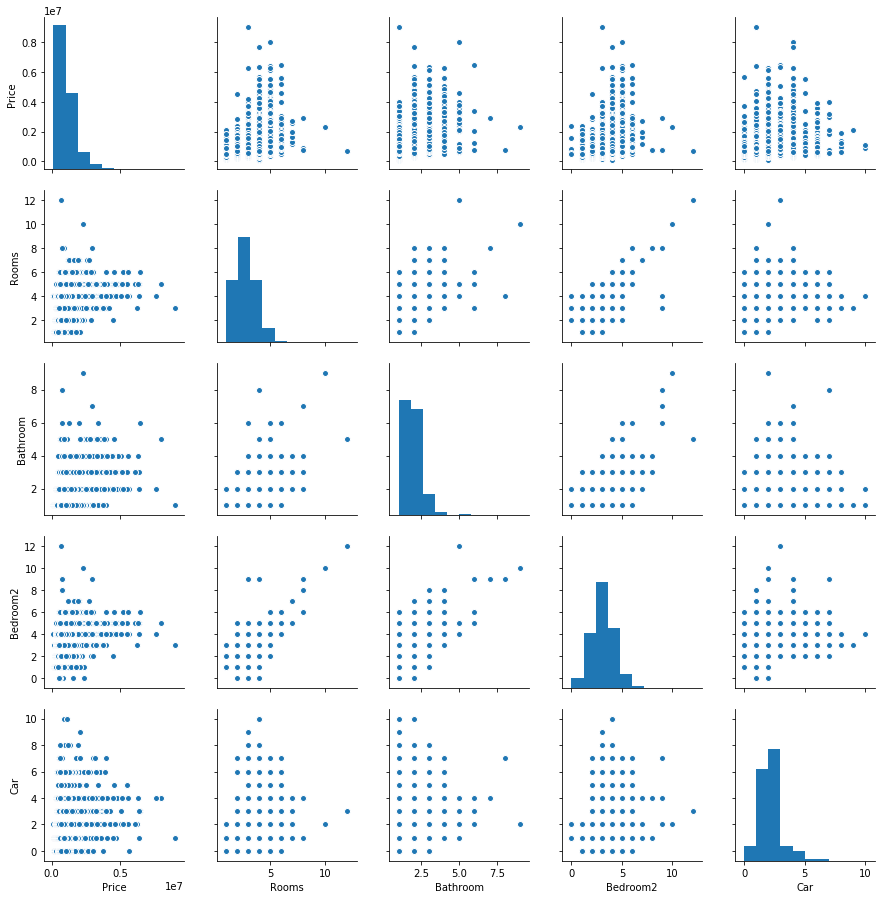

In [34]:
sns.pairplot(df)
plt.show()

Through the pair plot, we have a basic understanding of our data. 



__Linear Regression scatter plot__

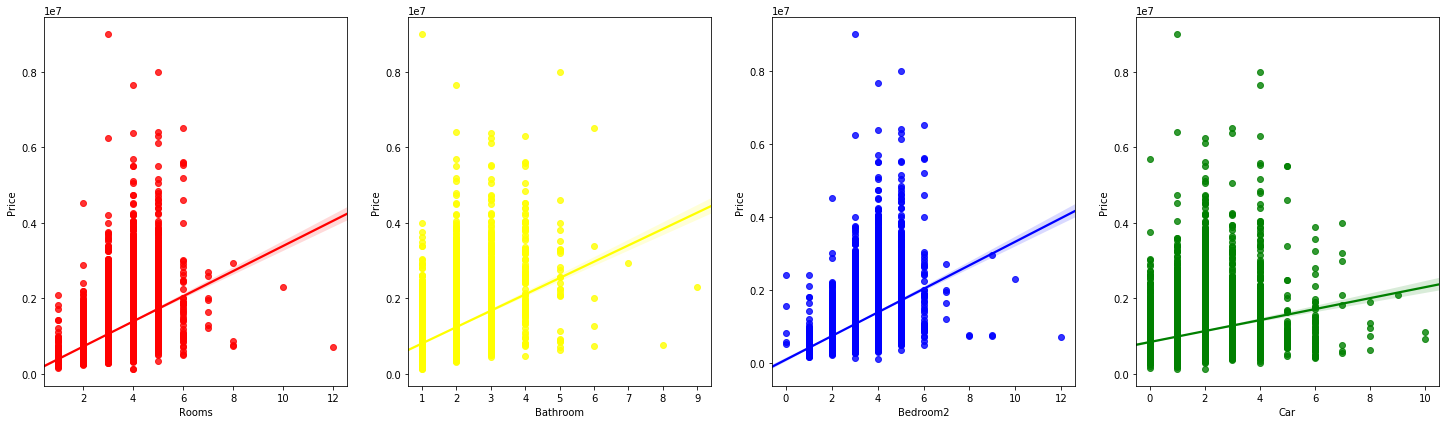

In [35]:
#regreesion plot between price and predictors.
fig, axs = plt.subplots(ncols=4)
fig.set_size_inches(25, 6.78)

sns.regplot(df.Rooms,df.Price,color="red",ax=axs[0])

sns.regplot(df.Bathroom,df.Price,color="yellow",ax=axs[1])

sns.regplot(df.Bedroom2,df.Price,color="blue",ax=axs[2])

sns.regplot(df.Car,df.Price,color="green",ax=axs[3])

plt.show()

There are linear relationship between price and rooms, bathroom, bedrooms and car.
But slope between car and price is the smallest.

__Comparing the correlation coefficient among the variables 'Rooms'; 'Bathroom'; 'Bedroom'__

In [36]:
df = housing.loc[:,["Price","Rooms","Bathroom","Bedroom2"]]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 4 columns):
Price       27247 non-null float64
Rooms       34857 non-null int64
Bathroom    26631 non-null float64
Bedroom2    26640 non-null float64
dtypes: float64(3), int64(1)
memory usage: 1.1 MB


In [37]:
corr = df.corr()
print(corr)

             Price     Rooms  Bathroom  Bedroom2
Price     1.000000  0.465238  0.429878  0.430275
Rooms     0.465238  1.000000  0.611826  0.946755
Bathroom  0.429878  0.611826  1.000000  0.614892
Bedroom2  0.430275  0.946755  0.614892  1.000000


_Based on the scatter plots and correlation coefficient table above, we found that there are collinearity among the predictors "Rooms"; "Bathroom"; and "Bedroom". Thus, we may only pick one of them in the model._

__c. side-by-side histograms or boxplots for relationships between numeric and categorical data__

_Boxplot between ('Type'; 'Method'; 'RangeofDistance'; 'yeargroup') and 'Price'_

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27247 entries, 1 to 34856
Data columns (total 5 columns):
Price              27247 non-null float64
Method             27247 non-null object
RangeofDistance    27246 non-null category
yeargroup          7015 non-null category
Type               27247 non-null object
dtypes: category(2), float64(1), object(2)
memory usage: 904.9+ KB


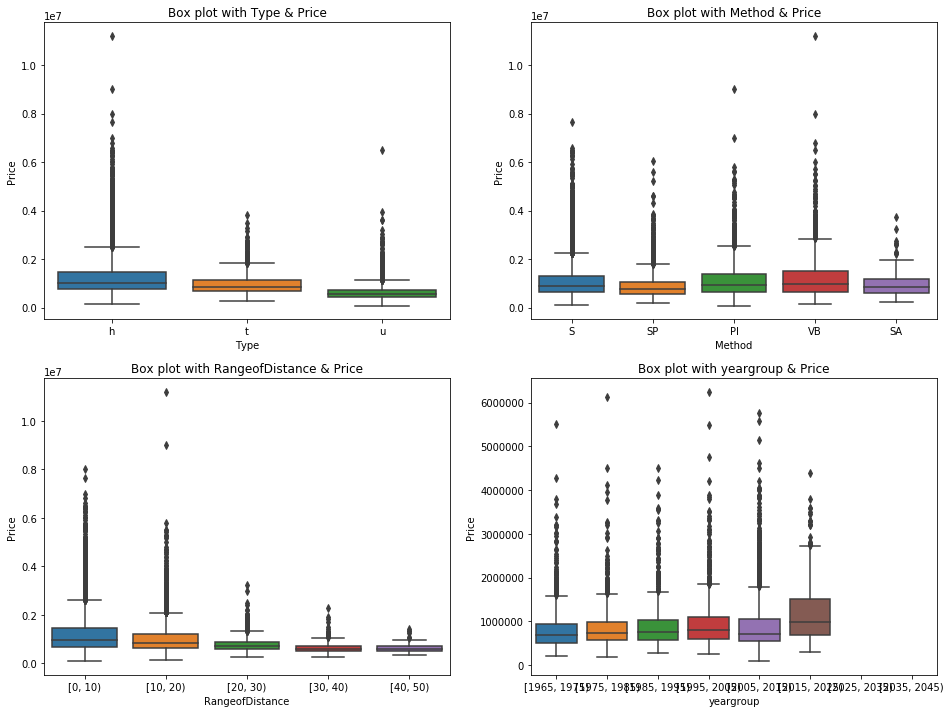

In [38]:
df = housing.loc[(housing['Price'].isnull() == False),["Price","Method","RangeofDistance","yeargroup","Type"]]
df.info()

plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
sns.boxplot(x="Type", y="Price", data = df)
plt.title("Box plot with Type & Price")

plt.subplot(2,2,2)
sns.boxplot(x="Method", y="Price", data = df)
plt.title("Box plot with Method & Price")

plt.subplot(2,2,3)
sns.boxplot(x="RangeofDistance", y="Price", data = df)
plt.title("Box plot with RangeofDistance & Price")

plt.subplot(2,2,4)
sns.boxplot(x="yeargroup", y="Price", data = df)
plt.title("Box plot with yeargroup & Price")

plt.show()

The above boxplot of price between four categorical variable: Type, Method, RangeDistance, yeargroup.
The price mean for different methods has very slight difference. However, type, distance and year should be main predictors of price 

# Model



__Split cleaning data into training and testing date set__ 

In [39]:
df = housing.loc[:,["Price","Rooms","Bathroom","Bedroom2","Car", "RangeofDistance", "yeargroup", "Type", "Method", "YearBuilt"]]
df = df.loc[((df['yeargroup'].isnull() == False) & 
             (df['Price'].isnull() == False) &
             (df['Car'].isnull() == False))]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6970 entries, 6 to 34854
Data columns (total 10 columns):
Price              6970 non-null float64
Rooms              6970 non-null int64
Bathroom           6970 non-null float64
Bedroom2           6970 non-null float64
Car                6970 non-null float64
RangeofDistance    6970 non-null category
yeargroup          6970 non-null category
Type               6970 non-null object
Method             6970 non-null object
YearBuilt          6970 non-null float64
dtypes: category(2), float64(5), int64(1), object(2)
memory usage: 503.9+ KB


Cross Validation:

In [40]:
X = df[['Rooms', 'Bathroom', 'Bedroom2', 'Car', 'RangeofDistance', 'yeargroup', 'Type', 'Method', "YearBuilt"]]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .20, random_state= 0)

train = X_train
train["Price"] = pd.Series(y_train, index = train.index)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5576 entries, 19944 to 13886
Data columns (total 10 columns):
Rooms              5576 non-null int64
Bathroom           5576 non-null float64
Bedroom2           5576 non-null float64
Car                5576 non-null float64
RangeofDistance    5576 non-null category
yeargroup          5576 non-null category
Type               5576 non-null object
Method             5576 non-null object
YearBuilt          5576 non-null float64
Price              5576 non-null float64
dtypes: category(2), float64(5), int64(1), object(2)
memory usage: 403.2+ KB


C:\Users\yvonne\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Model1 (numerical & categorical)

__Construct model with training data (numerical & categorical)__

In [41]:
model1 = smf.ols('Price ~ Rooms + Bathroom + Car + YearBuilt + C(RangeofDistance) + C(Type)', 
                 data = train) 
results1 = model1.fit()

__Summary table (numerical & categorical)__

In [42]:
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     444.4
Date:                Tue, 12 Jun 2018   Prob (F-statistic):               0.00
Time:                        15:33:49   Log-Likelihood:                -80219.
No. Observations:                5576   AIC:                         1.605e+05
Df Residuals:                    5565   BIC:                         1.605e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

_Based on the summary table, we will drop variable "Bedroom2" because its p-value is larger than 0.05. It is not significant._

__ANOVA table (numerical & categorical)__

In [43]:
table = sm.stats.anova_lm(results1)
print(table)

                        df        sum_sq       mean_sq            F  \
C(RangeofDistance)     4.0  5.369327e+13  1.342332e+13    73.027212   
C(Type)                2.0  3.471583e+14  1.735792e+14   944.326974   
Rooms                  1.0  2.893695e+14  2.893695e+14  1574.263943   
Bathroom               1.0  1.198421e+14  1.198421e+14   651.979861   
Car                    1.0  4.274719e+12  4.274719e+12    23.255860   
YearBuilt              1.0  2.605441e+12  2.605441e+12    14.174445   
Residual            5565.0  1.022917e+15  1.838126e+11          NaN   

                           PR(>F)  
C(RangeofDistance)   2.106098e-60  
C(Type)              0.000000e+00  
Rooms               2.105427e-303  
Bathroom            4.366969e-136  
Car                  1.455941e-06  
YearBuilt            1.683354e-04  
Residual                      NaN  


C:\Users\yvonne\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\yvonne\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\yvonne\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


__Prediction with testing data (numerical & categorical)__

In [44]:
y_pred = results1.predict(X_test)
print(y_pred.head())

33873    6.860507e+05
6580     1.164428e+06
25612    1.142819e+06
31672    7.675950e+05
2834     1.245417e+06
dtype: float64


__Compute mean squared error between y in testing data and prediction__

In [45]:
mse = mean_squared_error(y_test, y_pred)
print(mse)

154504501092.9267


### Model2 (only with numerical)

__Construct model (only with numerical)__

In [46]:
model2 = smf.ols('Price ~ Rooms + Bathroom + Car + YearBuilt', data = train) 
results2 = model2.fit()

__Summary table (only with numerical)__

In [47]:
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     691.2
Date:                Tue, 12 Jun 2018   Prob (F-statistic):               0.00
Time:                        15:33:49   Log-Likelihood:                -80732.
No. Observations:                5576   AIC:                         1.615e+05
Df Residuals:                    5571   BIC:                         1.615e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.376e+06   8.08e+05      2.942      0.0

__ANOVA table (only with numerical)__

In [48]:
table = sm.stats.anova_lm(results2)
print(table)

               df        sum_sq       mean_sq            F         PR(>F)
Rooms         1.0  4.423679e+14  4.423679e+14  2004.235073   0.000000e+00
Bathroom      1.0  1.646200e+14  1.646200e+14   745.843101  3.134098e-154
Car           1.0  1.288317e+12  1.288317e+12     5.836972   1.572477e-02
YearBuilt     1.0  1.971771e+12  1.971771e+12     8.933499   2.812098e-03
Residual   5571.0  1.229612e+15  2.207166e+11          NaN            NaN


C:\Users\yvonne\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\yvonne\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\yvonne\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


__Prediction with testing data (only with numerical)__

In [49]:
y_pred = results2.predict(X_test)
print(y_pred.head())

33873    6.577052e+05
6580     9.751886e+05
25612    1.110155e+06
31672    1.035417e+06
2834     9.721300e+05
dtype: float64


__Prediction with testing data (only with numerical)__

In [50]:
mse = mean_squared_error(y_test, y_pred)
print(mse)

182985781375.05118


_model 2 is not better than model 1 because mse1 = 155558942885.9952 is smaller than mse2 = 183580890847.54102_